In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('./train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
'''' 
01. Type of data
    - Numerical (age, fare, passengerId)
    - Categorical (survived, pClass, sex, SibSp, Parch, Embarked)
    - Mixed (Name, Ticket, Cabin)

02. Univariate (analyzing each column independently)
    - Distribution analysis (shape, central tendency, dispersion)
        - central tendency (mean, median, mode)
        - dispersion (describe the spread of data) -> (range, variance, std, iqr)
    - Identify potential issue (outliers, skewness, missing values)

Steps of doing univariate analysis on numerical columns
    - Descriptive statistics
    - Visualization
    - identify outliers
    - Skewness
    - Conclusion
    
03. Bivariate
04. Multivariate
'''

"' \n01. Type of data\n    - Numerical (age, fare, passengerId)\n    - Categorical (survived, pClass, sex, SibSp, Parch, Embarked)\n    - Mixed (Name, Ticket, Cabin)\n\n02. Univariate (analyzing each column independently)\n    - Distribution analysis (shape, central tendency, dispersion)\n        - central tendency (mean, median, mode)\n        - dispersion (describe the spread of data) -> (range, variance, std, iqr)\n    - Identify potential issue (outliers, skewness, missing values)\n\nSteps of doing univariate analysis on numerical columns\n    - Descriptive statistics\n    - Visualization\n    - identify outliers\n    - Skewness\n    - Conclusion\n    \n03. Bivariate\n04. Multivariate\n"

<Axes: ylabel='Frequency'>

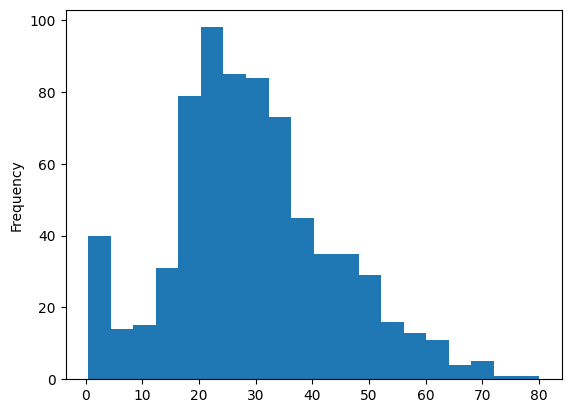

In [5]:
# --------------------- univariate analysis on age column
''' 
Conclusion:
- Age is almost normally distributed
- 19% of data is missing
- some outliers
'''

df['Age'].describe()
df['Age'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

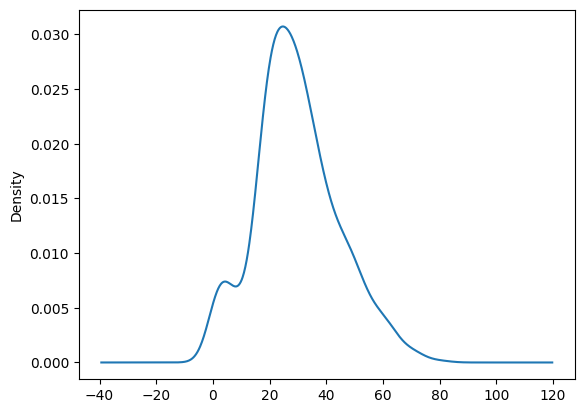

In [6]:
df['Age'].plot(kind = 'kde')

In [7]:
# if the value is 0 == Perfectly normal distribution
# if the value is + == positive skewed
# if the value is - == Negative skewed
#  
df['Age'].skew()

np.float64(0.38910778230082704)

<Axes: >

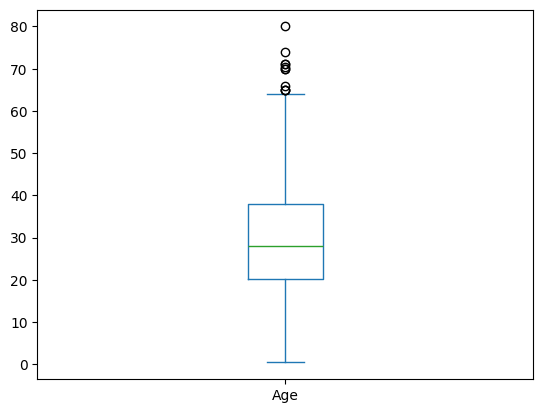

In [8]:
df['Age'].plot(kind = 'box')

In [9]:
# identify outlier
df[df['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [10]:
# finding missing value
df['Age'].isnull().sum()
df['Age'].isnull().sum() / len(df['Age']) # almost 19% missing value

np.float64(0.19865319865319866)

In [11]:
# ------------------------ univariate analysis on fare column
''' 
Conclusion:
- The data is highly positive skewed
- Fare contains group fair not the individual fare (this might be an issue)
- we need to create a new column individual fare
'''

df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

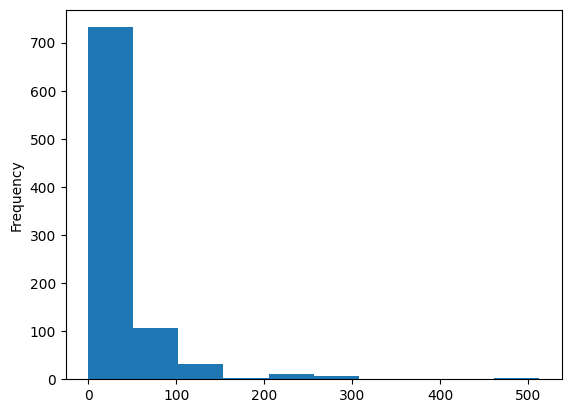

In [12]:
df['Fare'].plot(kind = 'hist')

np.float64(4.787316519674893)

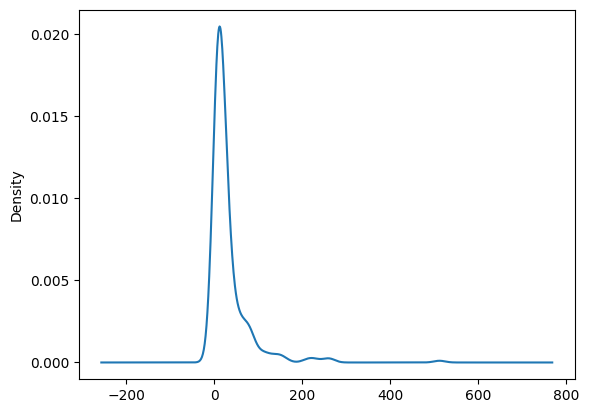

In [13]:
df['Fare'].plot(kind = 'kde') # left skew
df['Fare'].skew() # highly positive skewed

<Axes: >

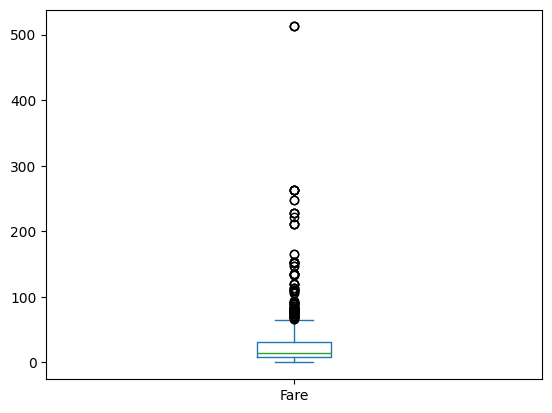

In [14]:
df['Fare'].plot(kind = 'box')

In [15]:
df[df['Fare'] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [16]:
df['Fare'].isnull().sum()

np.int64(0)

In [17]:
''' 
Steps of doing univariate analysis on numerical column
    - Descriptive statistics (compute the frequency)
    - Visualization (count plot, pie chart)
    - Missing values ()
    - Conclusion
'''

' \nSteps of doing univariate analysis on numerical column\n    - Descriptive statistics (compute the frequency)\n    - Visualization (count plot, pie chart)\n    - Missing values ()\n    - Conclusion\n'

<Axes: xlabel='Survived'>

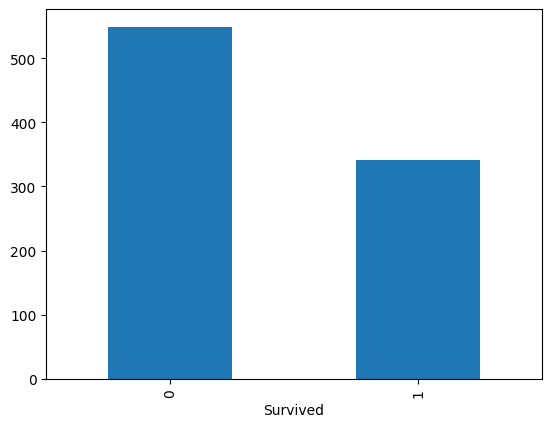

In [18]:
# ------------------- Univariate analysis on categorical column
# ------------------- Univariate analysis on survived column
''' 
Conclusion:
- Parch and SibSb can be merged
- create a new column called is_alone
'''

df['Survived'].value_counts()
df['Survived'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

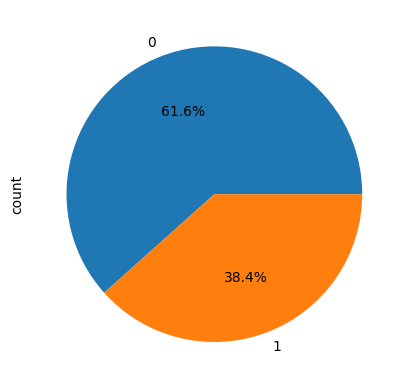

In [19]:
df['Survived'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [20]:
df['Survived'].isnull().sum()

np.int64(0)

np.int64(0)

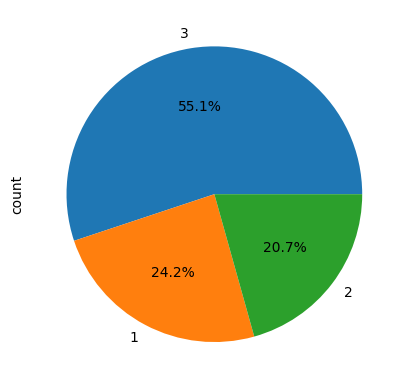

In [21]:
# ------------------------ Univariate analysis on Pclass column

df['Pclass'].value_counts()
df['Pclass'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
df['Pclass'].isnull().sum()

np.int64(0)

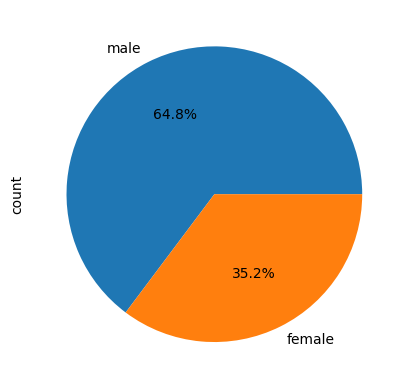

In [22]:
# ------------------------ Univariate analysis on sex column

df['Sex'].value_counts()
df['Sex'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
df['Sex'].isnull().sum()

np.int64(0)

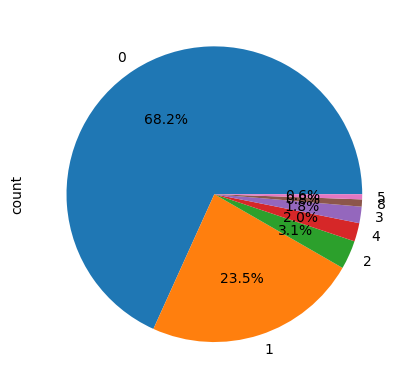

In [23]:
# ------------------------ Univariate analysis on SibSp column

df['SibSp'].value_counts()
df['SibSp'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
df['SibSp'].isnull().sum()

np.int64(0)

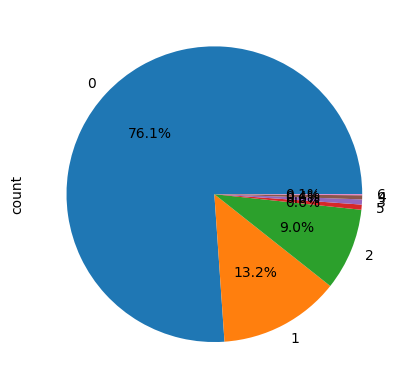

In [24]:
# ------------------------ Univariate analysis on Parch column

df['Parch'].value_counts()
df['Parch'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
df['Parch'].isnull().sum()

np.int64(2)

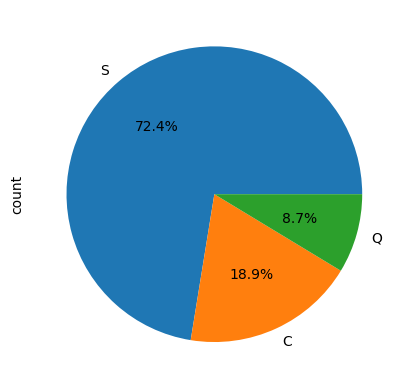

In [25]:
# ------------------------ Univariate analysis on embarked column

df['Embarked'].value_counts()
df['Embarked'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')
df['Embarked'].isnull().sum()

In [26]:
# for mixed column need some feature engineering for more insight   

In [27]:
''' 
Steps of doing Bivariate Analysis
    - Select 2 columns
    - Understanding type of column
        - Numerical - Numerical (scatterplot, 2D histplot, 2D kDEplot)
            - check correlation coefficient
        - Categorical - Numerical (barplot, boxplot, kdeplot, violinplot)
        - Categorical - Categorical (heatmap, stacked barplots, treemap)
'''

' \nSteps of doing Bivariate Analysis\n    - Select 2 columns\n    - Understanding type of column\n        - Numerical - Numerical (scatterplot, 2D histplot, 2D kDEplot)\n            - check correlation coefficient\n        - Categorical - Numerical (barplot, boxplot, kdeplot, violinplot)\n        - Categorical - Categorical (heatmap, stacked barplots, treemap)\n'

<Axes: xlabel='Pclass', ylabel='Survived'>

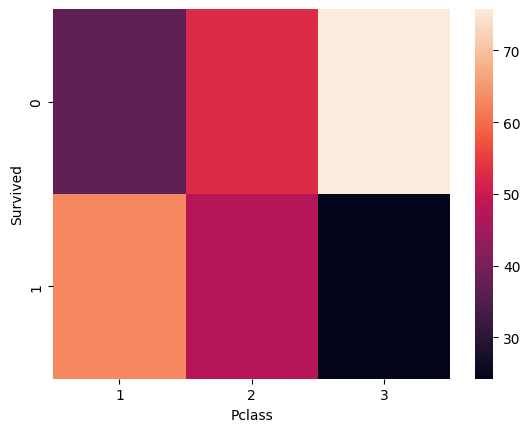

In [28]:
# ------------------- Bivariate analysis on 2 categorical col (Survived vs Pclass)

# contingency table
pd.crosstab(df['Survived'], df['Pclass'])
pd.crosstab(df['Survived'], df['Pclass'], normalize = 'columns') * 100 # give me % value
sns.heatmap(pd.crosstab(df['Survived'], df['Pclass'], normalize = 'columns') * 100) # give me % value

<Axes: xlabel='Sex', ylabel='Survived'>

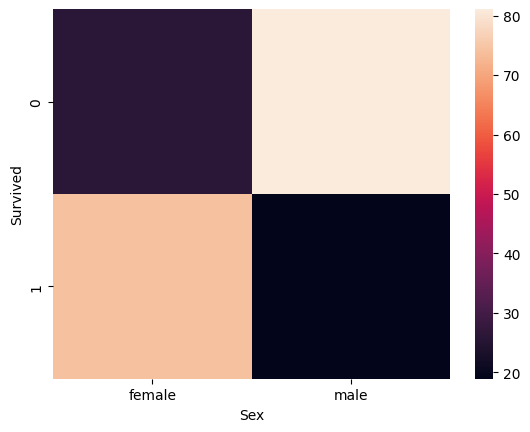

In [29]:
# --------------------- Bivariate analysis on 2 categorical col (Survived vs Sex)

pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns') * 100
sns.heatmap(pd.crosstab(df['Survived'], df['Sex'], normalize = 'columns') * 100)

<Axes: xlabel='Embarked', ylabel='Survived'>

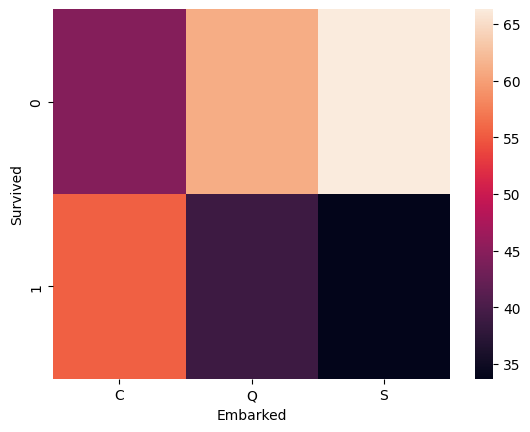

In [30]:
# ------------------------ Bivariate analysis on 2 categorical column (Survived vs Embarked)

pd.crosstab(df['Survived'], df['Embarked'], normalize = 'columns') * 100
sns.heatmap(pd.crosstab(df['Survived'], df['Embarked'], normalize = 'columns') * 100)

In [31]:
# --------------------- Bivariate analysis on 2 categorical column (Sex vs Embarked)

pd.crosstab(df['Sex'], df['Embarked'], normalize = 'columns') * 100
# sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize = 'columns') * 100)

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


<Axes: xlabel='Embarked', ylabel='Sex'>

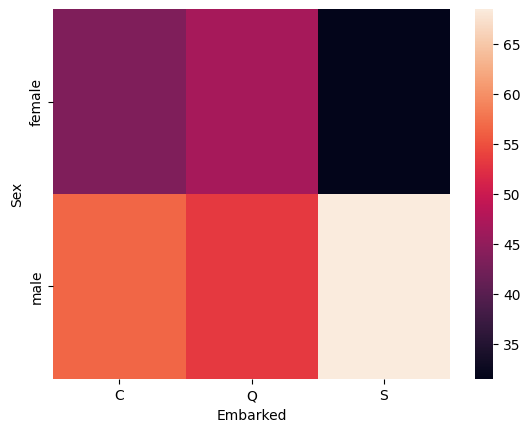

In [32]:
# --------------------- Bivariate analysis on 2 categorical column (Pclass vs Embarked)

pd.crosstab(df['Pclass'], df['Embarked'], normalize = 'columns') * 100
sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize = 'columns') * 100)

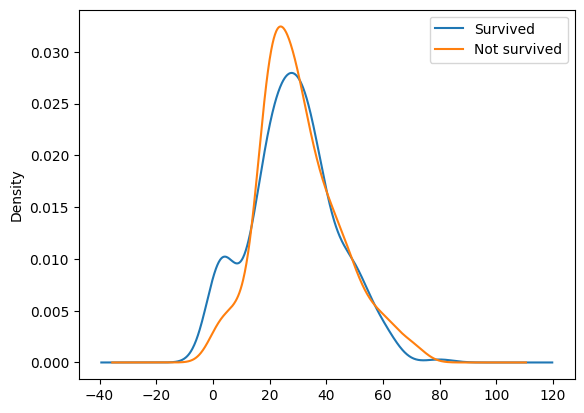

In [33]:
# --------------------- Bivariate analysis on Numerical & categorical column (Age vs Survival)

df[df['Survived'] == 1]['Age'].plot(kind = 'kde', label = 'Survived')
df[df['Survived'] == 0]['Age'].plot(kind = 'kde', label = 'Not survived')
plt.legend()
plt.show()


In [34]:
# ------------------------ Feature engineering on Fare column

df['SibSp'].value_counts()
df[df['SibSp'] == 8] 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [35]:
df[df['Ticket'] == 'CA. 2343'] 
df[df['Name'].str.contains('Sage')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [36]:
df1 = pd.read_csv('./test.csv')
df1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [37]:
df = pd.concat([df, df1])

In [38]:
df[df['Ticket'] == 'CA. 2343']
df['Ticket'].value_counts()

Ticket
CA. 2343            11
CA 2144              8
1601                 8
S.O.C. 14879         7
PC 17608             7
                    ..
A/5. 2151            1
350406               1
248706               1
STON/O2. 3101282     1
373450               1
Name: count, Length: 929, dtype: int64

In [39]:
df['individual_fare'] = df['Fare'] / (df['SibSp'] + df['Parch'] + 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000


In [40]:
df[['individual_fare', 'Fare']].describe()

,individual_fare,Fare
count,1308.000000,1308.000000
mean,20.518215,33.295479
std,35.774337,51.758668
min,0.000000,0.000000
25%,7.452767,7.895800
50%,8.512483,14.454200
75%,24.237500,31.275000
max,512.329200,512.329200


In [41]:
df[df['individual_fare'] == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,512.3292
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,512.3292


<Axes: >

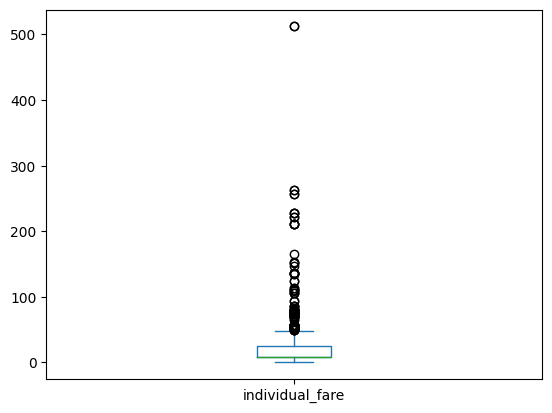

In [42]:
df['individual_fare'].plot(kind = 'box')

In [43]:
# create a new column by the name of family size

df['family_size'] = df['SibSp'] + df['Parch'] + 1

In [44]:
# create a new column by the name of family type
''' 
1 -> alone
2 - 4 -> small family
> 5 -> large family
'''

def transform_family_size(num):
    if num == 1:
        return 'Alone'
    elif num >= 2 and num <= 4:
        return "Small family"
    else:
        return "Large family"

In [45]:
df['family_type'] = df['family_size'].apply(lambda x: transform_family_size(x))

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,Small family
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small family
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small family
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone


In [47]:
pd.crosstab(df['Survived'], df['family_type'], normalize = 'columns') * 100

family_type,Alone,Large family,Small family
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


In [48]:
# create a new column by the name of surname

df['Surname'] = df['Name'].str.split(',').str.get(0)

In [49]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.625000,2,Small family,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small family,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.925000,1,Alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small family,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.050000,1,Alone,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,8.050000,1,Alone,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,7.250000,1,Alone,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,8.050000,1,Alone,Ware


In [50]:
# create a new column by the name of name_title 

df['title'] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [51]:
df['title'].value_counts()

title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Mme.           1
Don.           1
Sir.           1
Lady.          1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [52]:
# df['title'] = df['title'].str.replace(['Rev.', 'Dr.', 'Major.', 'Don.', 'Capt.', 'the', 'Jonkheer'], 'Other')
df['title'] = df['title'].str.replace(r'Rev\.|Dr\.|Major\.|Don\.|Capt\.|the|Jonkheer', 'Other.', regex=True)


In [53]:
df['title'].value_counts()

title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
Other.      21
Col.         4
Ms.          2
Mlle.        2
Mme.         1
Sir.         1
Lady.        1
Other..      1
Dona.        1
Name: count, dtype: int64

In [54]:
temp_df = df[df['title'].isin(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Other.'])]

In [55]:
pd.crosstab(temp_df['Survived'], temp_df['title'], normalize = 'columns') * 100

title,Master.,Miss.,Mr.,Mrs.,Other.
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,72.222222
1.0,57.5,69.78022,15.667311,79.2,27.777778


In [56]:
temp_df['Cabin'].isnull().sum() / (len(df['Cabin']))

np.float64(0.771581359816654)

In [57]:
df['Cabin'].value_counts().head()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
Name: count, dtype: int64

In [58]:
df['Cabin'].fillna('M', inplace=True)
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_23416\2922679274.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('M', inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,individual_fare,family_size,family_type,Surname,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,3.625000,2,Small family,Braund,Mr.
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.641650,2,Small family,Cumings,Mrs.
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,7.925000,1,Alone,Heikkinen,Miss.
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.550000,2,Small family,Futrelle,Mrs.
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,8.050000,1,Alone,Allen,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,M,S,8.050000,1,Alone,Spector,Mr.
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,108.900000,1,Alone,Oliva y Ocana,Dona.
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,M,S,7.250000,1,Alone,Saether,Mr.
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,M,S,8.050000,1,Alone,Ware,Mr.


In [59]:
df['Cabin'].value_counts()

Cabin
M                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
C39                   1
B24                   1
D40                   1
D38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [60]:
df['deck'] = df['Cabin'].str[0]

In [61]:
df['deck'].value_counts()

deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [62]:
pd.crosstab(df['deck'], df['Pclass'])

Pclass,1,2,3
deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


<Axes: xlabel='Survived'>

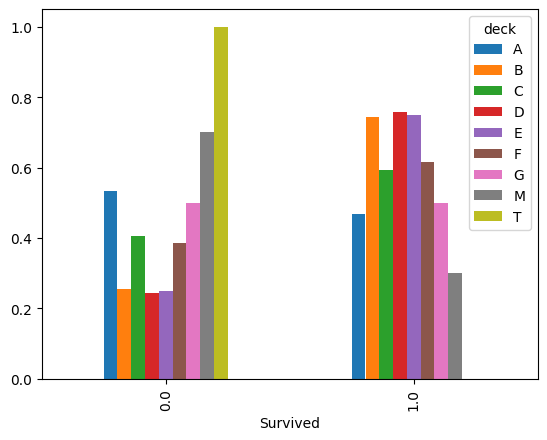

In [63]:
pd.crosstab(df['Survived'], df['deck'], normalize = 'columns').plot(kind = 'bar')